<a href="https://colab.research.google.com/github/SambhramShetty2003/MachineLearing2024/blob/main/Patient_Survival_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing the libraries** and dependencies of the dataset required for the Project. Dataset used: https://www.kaggle.com/datasets/mitishaagarwal/patient

# 1. Data prepration

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Machine Learning/patient Survival Predicition/dataset.csv')

In [ ]:
df.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,Unnamed: 83,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,NaN,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,NaN,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,NaN,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,NaN,0
4,92056,34377,33,19.0,NaN,0,Caucasian,M,188.0,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,Trauma,Trauma,NaN,0


In [ ]:
df.shape

(91713, 85)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Data columns (total 85 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   encounter_id                   91713 non-null  int64  
 1   patient_id                     91713 non-null  int64  
 2   hospital_id                    91713 non-null  int64  
 3   age                            87485 non-null  float64
 4   bmi                            88284 non-null  float64
 5   elective_surgery               91713 non-null  int64  
 6   ethnicity                      90318 non-null  object 
 7   gender                         91688 non-null  object 
 8   height                         90379 non-null  float64
 9   icu_admit_source               91601 non-null  object 
 10  icu_id                         91713 non-null  int64  
 11  icu_stay_type                  91713 non-null  object 
 12  icu_type                       91713 non-null 

In [ ]:
# Understanding the Numericals and Categorical datasets
num_datatype=0
cat_datatype=0

for col in df.columns:
  if df[col].dtypes == "int64" or df[col].dtypes == 'float64':
    num_datatype+=1
  elif df[col].dtypes== 'object':
    cat_datatype+=1

print(f" The Numerical columns are: {num_datatype}")
print(f" The Categorical columns are: {cat_datatype}")

 The Numerical columns are: 78
 The Categorical columns are: 7


# Exploratory data analysis (EDA)

In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Unnamed: 83,91713
d1_potassium_max,9585
d1_potassium_min,9585
h1_mbp_noninvasive_min,9084
h1_mbp_noninvasive_max,9084
...,...
icu_stay_type,0
icu_id,0
elective_surgery,0
hospital_id,0


In [ ]:
df.drop(["Unnamed: 83"], axis=1,inplace=True)

In [ ]:
df.shape

(91713, 84)

In [ ]:
#  Checking for the dataset with rows duplicated values
duplicate_rows=df[df.duplicated()]
if duplicate_rows.empty:
  print("No duplicate rows found. ")
else:
  Train=df.drop_duplicates()

No duplicate rows found. 


In [ ]:
df.shape

(91713, 84)

In [ ]:
df.describe()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,weight,...,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,hospital_death
count,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,88993.000000,...,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,91713.000000
mean,65606.079280,65537.131464,105.669262,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,84.028340,...,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638,0.086302
std,37795.088538,37811.252183,62.854406,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,25.011497,...,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169,0.280811
min,1.000000,1.000000,2.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,38.600000,...,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,66.800000,...,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,80.300000,...,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,97.100000,...,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,186.000000,...,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.isnull().sum()

,0
encounter_id,0
patient_id,0
hospital_id,0
age,4228
bmi,3429
...,...
lymphoma,715
solid_tumor_with_metastasis,715
apache_3j_bodysystem,1662
apache_2_bodysystem,1662


<ipython-input-14-dd77b71fa604>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='apache_2_bodysystem', palette='dark', ax=axs[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping wi

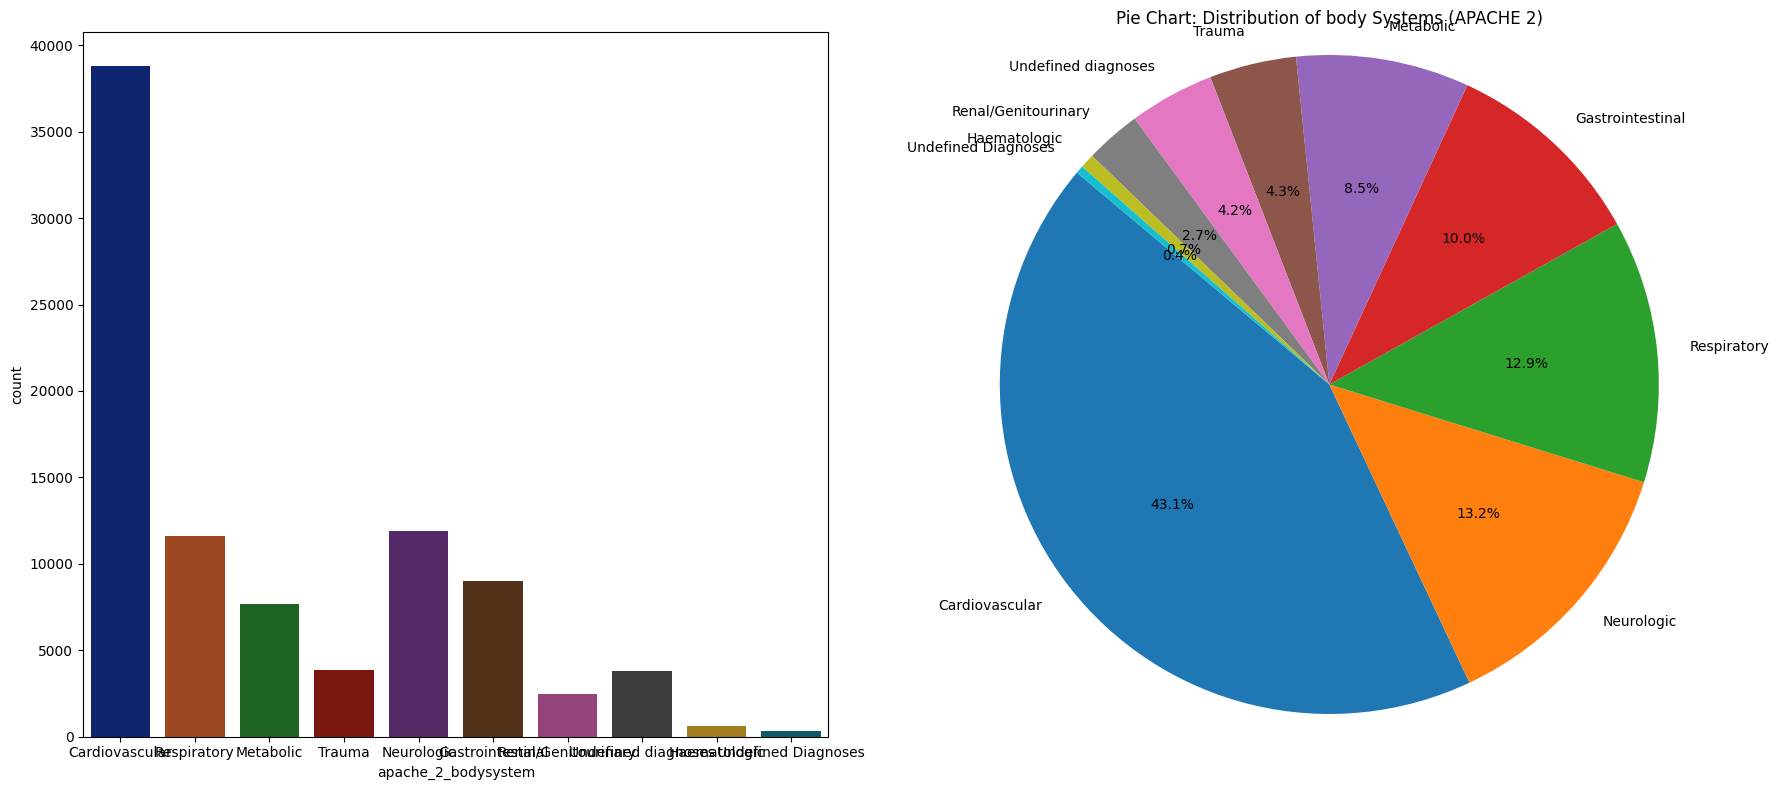

In [ ]:
fig, axs=plt.subplots(1,2,figsize=(18,8))

sns.countplot(data=df, x='apache_2_bodysystem', palette='dark', ax=axs[0])
counts=df['apache_2_bodysystem'].value_counts()
axs[1].pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title("Pie Chart: Distribution of body Systems (APACHE 2)")
axs[1].axis('equal')
plt.tight_layout()
plt.show()

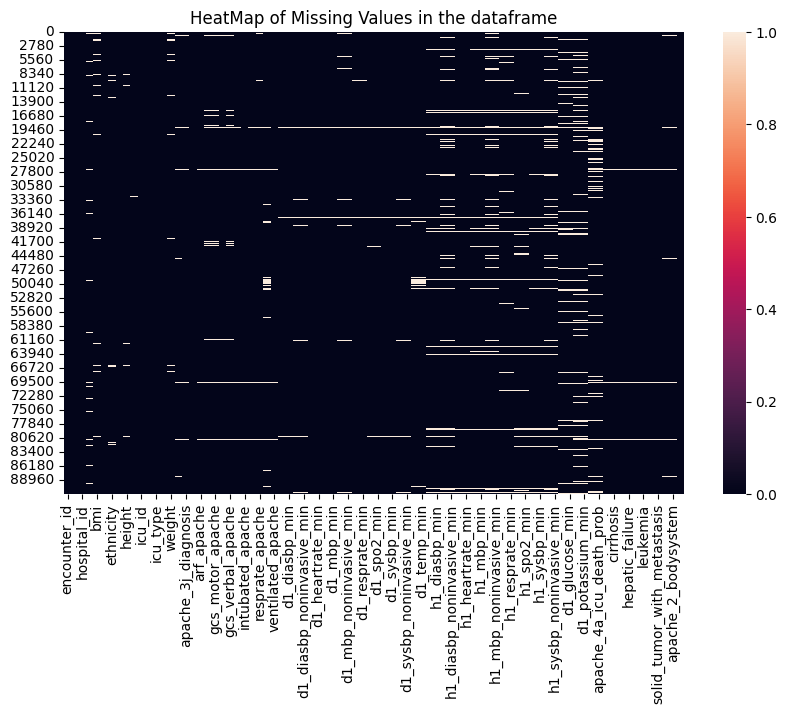

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(), cmap='rocket')
plt.title('HeatMap of Missing Values in the dataframe')
plt.show()

In [ ]:
# Assuming df is your DataFrame
df = df.dropna(subset=['age', 'gender', 'hospital_death', 'bmi'])

# Create a histogram
fig = px.histogram(df,
                   x='age',
                   color='gender',
                   hover_data=['age', 'gender', 'hospital_death', 'bmi'],
                   marginal='box',
                   title='Age Distribution by Gender with Hospital Death')

# Show the figure
fig.show()


# Model Building

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression

In [ ]:
target='hospital_death'
numeric_features=df.select_dtypes(include=['int','float']).columns.tolist()
numeric_features.remove(target)
categorical_features=df.select_dtypes(include=['object']).columns.tolist()

In [ ]:
# defining the transformers
numeric_transformer =Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='median')),
     ('scaler',StandardScaler())])

categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value='missing')),
    ('oneshot',OneHotEncoder(handle_unknown='ignore'))])

# define Preprocessor
preprocessor=ColumnTransformer(transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Define the model pipeline
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LogisticRegression())
])

Model Training

In [ ]:
X=df.drop(['hospital_death'], axis=1)
y=df['hospital_death']

In [ ]:
x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=0.25, random_state=42)

model_pipeline.fit(x_train,y_train)
accuracy=model_pipeline.score(x_test,y_test)
y_pred=model_pipeline.predict(x_test)

In [ ]:
print("Model Accuracy of logistic regression ")
print(" Accuracy:", accuracy)

Model Accuracy of logistic regression 
 Accuracy: 0.928045594870577


In [ ]:
index_to_access = 40000

if index_to_access < df.shape[0]:  # Ensure index is within bounds
    Dataset_row = df.iloc[[index_to_access]]

    print(Dataset_row['hospital_death'])
    if "hospital_death" in Dataset_row.columns:
        Dataset_row = Dataset_row.drop(columns=["hospital_death"])

    # Make predictions
    prediction = model_pipeline.predict(Dataset_row)
    print("\n------------------------------------\n")
    if prediction == 0:
        print("\tPatient's possibility of Death is high ")
    elif prediction == 1:
        print("\tPatient can be Survived ")
    print("\n------------------------------------")
else:
    print(f"Index {index_to_access} is out of bounds. The DataFrame has only {df.shape[0]} rows.")


44446    0
Name: hospital_death, dtype: int64

------------------------------------

	Patient's possibility of Death is high 

------------------------------------


In [ ]:
print(Dataset_row.values.tolist())

[[129652, 67808, 171, 75.0, 44.921875, 0, 'Caucasian', 'F', 160.0, 'Accident & Emergency', 404, 'admit', 'CSICU', 0.047222222, 115.0, 117.0, 106.01, 0, 0.0, 4.0, 6.0, 0.0, 5.0, 30.0, 0.0, 56.0, 29.0, 36.3, 0.0, 66.0, 33.0, 66.0, 33.0, 66.0, 34.0, 85.0, 56.0, 85.0, 56.0, 29.0, 12.0, 99.0, 93.0, 153.0, 100.0, 153.0, 100.0, 37.3, 36.3, 52.0, 35.0, 52.0, 35.0, 46.0, 37.0, 71.0, 56.0, 71.0, 56.0, 19.0, 14.0, 97.0, 95.0, 139.0, 100.0, 139.0, 100.0, 98.0, 93.0, 3.8, 3.5, 0.07, 0.03, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 'Cardiovascular', 'Cardiovascular']]


Saving the trained model

In [ ]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model_pipeline,open(filename, 'wb'))

In [ ]:
#loading the saved model
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
print(df.hospital_death.values)

[0 0 0 ... 0 0 0]


In [ ]:
index_to_access = 84100

if index_to_access < df.shape[0]:  # Ensure index is within bounds
    Dataset_row = df.iloc[[index_to_access]]

    if "hospital_death" in Dataset_row.columns:
        Dataset_row = Dataset_row.drop(columns=["hospital_death"])

    # Make predictions
    prediction = loaded_model.predict(Dataset_row)
    print("\n------------------------------------\n")
    if prediction == 0:
        print("\tPatient Death")
    elif prediction == 1:
        print("\tPatient Survived")
    print("\n------------------------------------")
else:
    print(f"Index {index_to_access} is out of bounds. The DataFrame has only {df.shape[0]} rows.")


------------------------------------

	Patient Survived

------------------------------------


# Separated columns of death and survival probablities

In [ ]:
alive=df[df['hospital_death']==1]
dead=df[df['hospital_death']==0]

In [ ]:
alive.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
25,29208,114628,118,68.0,26.010703,0,Caucasian,F,165.1,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,1
46,40903,55564,118,64.0,16.980389,0,Caucasian,M,180.3,Operating Room / Recovery,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,Neurological,Neurologic,1
73,75834,43161,118,74.0,25.311715,0,Caucasian,M,167.6,Accident & Emergency,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,Hematological,Haematologic,1
128,90572,44382,118,65.0,29.531111,1,Caucasian,M,180.3,Other Hospital,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Musculoskeletal/Skin,Undefined diagnoses,1
129,44303,114404,118,72.0,30.663093,0,African American,F,149.9,Floor,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,1


In [ ]:
dead.head()

,encounter_id,patient_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,icu_admit_source,...,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem,hospital_death
0,66154,25312,118,68.0,22.73,0,Caucasian,M,180.3,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Sepsis,Cardiovascular,0
1,114252,59342,81,77.0,27.42,0,Caucasian,F,160.0,Floor,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Respiratory,Respiratory,0
2,119783,50777,118,25.0,31.95,0,Caucasian,F,172.7,Accident & Emergency,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Metabolic,Metabolic,0
3,79267,46918,118,81.0,22.64,1,Caucasian,F,165.1,Operating Room / Recovery,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Cardiovascular,Cardiovascular,0
5,33181,74489,83,67.0,27.56,0,Caucasian,M,190.5,Accident & Emergency,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,Neurological,Neurologic,0


In [ ]:
filtered_df = df[df['age'] == 68.0]
new_df=filtered_df[filtered_df['bmi']==22.73]
print(new_df)

   encounter_id  patient_id  hospital_id   age    bmi  elective_surgery  \
0         66154       25312          118  68.0  22.73                 0   

   ethnicity gender  height icu_admit_source  ...  cirrhosis  \
0  Caucasian      M   180.3            Floor  ...        0.0   

  diabetes_mellitus hepatic_failure  immunosuppression  leukemia  lymphoma  \
0               1.0             0.0                0.0       0.0       0.0   

   solid_tumor_with_metastasis  apache_3j_bodysystem  apache_2_bodysystem  \
0                          0.0                Sepsis       Cardiovascular   

   hospital_death  
0               0  

[1 rows x 84 columns]
